In [ ]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Hacemos Web Scrapping y obtenemos el html
direccion="https://www.flat.mx/venta/propiedades-en-ciudad-de-mexico"
pagina=requests.get(direccion)
sopa=BeautifulSoup(pagina.content,"html.parser")
print(sopa.prettify())

<!DOCTYPE html>
<html lang="es-MX">
 <head>
  <meta charset="utf-8"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width,height=device-height, initial-scale=1, shrink-to-fit=yes" name="viewport"/>
  <link href="/img/favicon/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <link href="/img/favicon/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link href="/img/favicon/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
  <link href="/img/favicon/favicon.ico" rel="shortcut icon"/>
  <meta content="Flat.mx" name="apple-mobile-web-app-title"/>
  <meta content="Flat.mx" name="application-name"/>
  <meta content="#da532c" name="msapplication-TileColor"/>
  <meta content="#F5F7FF" name="theme-color"/>
  <link href="/manifest.json" rel="manifest"/>
  <title>
   Propiedades en venta en Ciudad de México y Estado de México | Flat.mx
  </titl

In [ ]:
datos=sopa.find_all('p',class_="flex items-center gap-[0.625rem] truncate font-montserrat text-sm font-bold tabular-nums text-emerald md:text-base")
print(datos)

[<p class="flex items-center gap-[0.625rem] truncate font-montserrat text-sm font-bold tabular-nums text-emerald md:text-base"><span>$4,900,000</span></p>, <p class="flex items-center gap-[0.625rem] truncate font-montserrat text-sm font-bold tabular-nums text-emerald md:text-base"><span>$3,800,000</span></p>, <p class="flex items-center gap-[0.625rem] truncate font-montserrat text-sm font-bold tabular-nums text-emerald md:text-base"><span>$3,895,000</span></p>, <p class="flex items-center gap-[0.625rem] truncate font-montserrat text-sm font-bold tabular-nums text-emerald md:text-base"><span>$2,395,000</span></p>, <p class="flex items-center gap-[0.625rem] truncate font-montserrat text-sm font-bold tabular-nums text-emerald md:text-base"><span>$3,600,000</span></p>, <p class="flex items-center gap-[0.625rem] truncate font-montserrat text-sm font-bold tabular-nums text-emerald md:text-base"><span>$5,400,000</span></p>, <p class="flex items-center gap-[0.625rem] truncate font-montserrat t

In [ ]:
print(type(datos))

<class 'bs4.element.ResultSet'>


In [ ]:
#Guardamos los precios en una lista
precios=list()
for x in datos:
    precios.append(x.text)
precios

['$4,900,000',
 '$3,800,000',
 '$3,895,000',
 '$2,395,000',
 '$3,600,000',
 '$5,400,000',
 '$6,500,000',
 '$3,907,209',
 '$4,195,000$4,395,000 5%',
 '$5,295,000',
 '$3,545,000$3,595,000 2%',
 '$3,200,000',
 '$4,500,000',
 '$1,280,000',
 '$11,000,000',
 '$1,730,000',
 '$3,200,000',
 '$2,400,000',
 '$4,800,000',
 '$2,400,000']

In [ ]:
#Verificamos que el tipo de dato que contiene precios es string
print(type(precios[0]))

<class 'str'>


In [ ]:
#Hacemos una limpieza de datos manual
precios[8]='$4,195,000'
precios[10]='$3,545,000'
precios

['$4,900,000',
 '$3,800,000',
 '$3,895,000',
 '$2,395,000',
 '$3,600,000',
 '$5,400,000',
 '$6,500,000',
 '$3,907,209',
 '$4,195,000',
 '$5,295,000',
 '$3,545,000',
 '$3,200,000',
 '$4,500,000',
 '$1,280,000',
 '$11,000,000',
 '$1,730,000',
 '$3,200,000',
 '$2,400,000',
 '$4,800,000',
 '$2,400,000']

In [ ]:
#Convertimos de string a int los precios
for x in range(len(precios)):
  precios[x]= precios[x].replace('$', '')
  precios[x]= precios[x].replace(',', '')
  precios[x] = int(precios[x])
precios

[4900000,
 3800000,
 3895000,
 2395000,
 3600000,
 5400000,
 6500000,
 3907209,
 4195000,
 5295000,
 3545000,
 3200000,
 4500000,
 1280000,
 11000000,
 1730000,
 3200000,
 2400000,
 4800000,
 2400000]

In [ ]:
#Obtenemos el html de los tamaños
datos=sopa.find_all ('span', class_="ml-2 truncate font-montserrat text-xs font-bold tabular-nums text-black")
print(datos)

[<span class="ml-2 truncate font-montserrat text-xs font-bold tabular-nums text-black">335 m²</span>, <span class="ml-2 truncate font-montserrat text-xs font-bold tabular-nums text-black">2</span>, <span class="ml-2 truncate font-montserrat text-xs font-bold tabular-nums text-black">3</span>, <span class="ml-2 truncate font-montserrat text-xs font-bold tabular-nums text-black">5</span>, <span class="ml-2 truncate font-montserrat text-xs font-bold tabular-nums text-black">5.0</span>, <span class="ml-2 truncate font-montserrat text-xs font-bold tabular-nums text-black">220 m²</span>, <span class="ml-2 truncate font-montserrat text-xs font-bold tabular-nums text-black">3</span>, <span class="ml-2 truncate font-montserrat text-xs font-bold tabular-nums text-black">3</span>, <span class="ml-2 truncate font-montserrat text-xs font-bold tabular-nums text-black">1</span>, <span class="ml-2 truncate font-montserrat text-xs font-bold tabular-nums text-black">5.0</span>, <span class="ml-2 truncat

In [ ]:
#Guardamos los tamaños en una lista
tamaños=[]
for x in datos:
  z=x.text
  if('m²' in z):
    tamaños.append(z)
tamaños

['335 m²',
 '220 m²',
 '82 m²',
 '69 m²',
 '83 m²',
 '243 m²',
 '185 m²',
 '114 m²',
 '119 m²',
 '129 m²',
 '82 m²',
 '73 m²',
 '180 m²',
 '74 m²',
 '660 m²',
 '59 m²',
 '117 m²',
 '60 m²',
 '176 m²',
 '82 m²']

In [ ]:
#Convertimos los tamaños de string a int
for i in range(len(tamaños)):
  tamaños[i]=int(tamaños[i].replace('m²', ''))
tamaños

[335,
 220,
 82,
 69,
 83,
 243,
 185,
 114,
 119,
 129,
 82,
 73,
 180,
 74,
 660,
 59,
 117,
 60,
 176,
 82]

In [ ]:
#Obtenemos el html de los baños
datos = sopa.find_all('p', class_="flex flex-shrink-0 flex-nowrap items-center") 
#convertimos el html a string para utilizar la funcion 'in'
datos=str(datos)
print(datos)
print('baños' in datos)

[<p class="flex flex-shrink-0 flex-nowrap items-center" title="335 metros cuadrados"><svg height="20" viewbox="0 0 20 20" width="20" xmlns="http://www.w3.org/2000/svg"><g fill="none" fill-rule="evenodd"><path d="M0 0h20v20H0z"></path><path d="M1.4 15.733V4.267h17.2v11.466H1.4zM18.253 4.628H1.747l-.001 4.85h8.515l-.001 5.894h7.993V4.628zM9.91 9.853H1.75v5.506h8.16V9.853z" fill="#6F6F89" fill-rule="nonzero"></path></g></svg> <span class="ml-2 truncate font-montserrat text-xs font-bold tabular-nums text-black">335 m²</span></p>, <p class="flex flex-shrink-0 flex-nowrap items-center" title="2 recámaras"><svg height="21" viewbox="0 0 21 21" width="21" xmlns="http://www.w3.org/2000/svg"><g fill="none" fill-rule="evenodd"><path d="M.628.909h20v20h-20z"></path><path d="M2.431 11.111v-4.89c0-.146.127-.251.254-.251.149 0 .255.126.255.252v4.889H2.43zm.02 2.275h16.33v-1.854H2.452v1.854zm16.331-2.296H3.365V9.973H17.68c.614 0 1.102.506 1.102 1.096v.021zM6.8 9.152c0 .21-.17.4-.403.4H3.788a.415.415 0 

In [ ]:
#Econtramos la posicion del primer baño, así que crearemos un ciclo para encontrar todos los baños
pos=datos.find('baño')
print(pos)
print(datos[pos-2:pos+5])

1616
3 baños


In [ ]:
baños=[]
while(datos.find('baño')!=-1):
  pos=datos.find('baño')
  baños.append(int(datos[pos-2]))
  datos=datos.replace(datos[0:pos+4],'')
baños.append(2)
print(datos)
baños

s"><svg height="21" viewbox="0 0 21 21" width="21" xmlns="http://www.w3.org/2000/svg"><g fill="none" fill-rule="evenodd"><path d="M.326.5h20v20h-20z"></path><path d="M16.055 15.765H4.597l-1.825-4.95H17.88l-1.825 4.95zm-8.72-11.16c.306-.062.573-.021.774.107l-2.49 2.53c-.298-.485-.077-1.32.557-1.965.345-.351.757-.59 1.16-.671zm11.428 5.881H3.997V6.033c0-.31.119-.6.333-.817a1.12 1.12 0 0 1 1.527-.067c-.742.825-.916 1.905-.37 2.46a.164.164 0 0 0 .115.05.163.163 0 0 0 .115-.05L8.47 4.81a.165.165 0 0 0 0-.232c-.284-.29-.71-.396-1.198-.296-.41.083-.823.31-1.184.635a1.441 1.441 0 0 0-1.988.066c-.274.28-.427.652-.427 1.05v4.453H1.888a.164.164 0 0 0-.162.165c0 .092.073.165.162.165h.537l1.908 5.172a.161.161 0 0 0 .151.106h.488v.496c0 .09.071.165.162.165.089 0 .162-.074.162-.165v-.496h10.06v.496c0 .09.073.165.162.165.09 0 .162-.074.162-.165v-.496h.487a.161.161 0 0 0 .152-.106l1.908-5.172h.536c.09 0 .163-.073.163-.165a.164.164 0 0 0-.163-.165z" fill="#6F6F89"></path></g></svg> <span class="ml-2 tru

[3, 3, 2, 1, 2, 3, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 3, 2, 2, 2]

In [ ]:
print(len(precios))
print(len(tamaños))
print(len(baños))

20
20
20


In [ ]:
#Sacamos correlación entre baños, tamaño y precio
ByP=np.corrcoef(baños, precios)
TyP=np.corrcoef(tamaños, precios)
print(ByP)
print(TyP)

[[1.         0.29850215]
 [0.29850215 1.        ]]
[[1.         0.88834468]
 [0.88834468 1.        ]]


In [ ]:
#Vemos que la correlacion entre tamaño y precio es mayor, así que sacamos la correlación lineal

sx=0
sy=0
sx2=0
sxy=0
n=len(precios)

for i in range(n):
  sx+=tamaños[i]
  sy+=precios[i]
  sx2+=tamaños[i]**2
  sxy+=tamaños[i]*precios[i]

m=(sxy - ((sx*sy)/n)) / (sx2 - ((sx**2)/n))
a=((n*sxy)-(sx*sy)) / ((n*sx2) - (sx**2))
print(m, a)

bclase=precios[15]-(m*tamaños[15])
bgoogle=(sy-(a*sx))/n
print(bclase, bgoogle)

13320.0398843754 13320.039884375397
944117.6468218515 2004532.1841646251


In [ ]:
#Creamos la regresión lineal
yclase=[]
ygoogle=[]
for i in range(n):
  yclase.append(m*tamaños[i]+bclase)
  ygoogle.append(a*tamaños[i]+bgoogle)

print(yclase)
print(ygoogle)

[5406331.008087611, 3874526.4213844393, 2036360.9173406344, 1863200.398843754, 2049680.9572250098, 4180887.3387250733, 3408325.0254313, 2462602.193640647, 2529202.393062524, 2662402.791906278, 2036360.9173406344, 1916480.5583812557, 3341724.826009423, 1929800.5982656311, 9735343.970509615, 1730000.0, 2502562.313293773, 1743320.0398843754, 3288444.666471922, 2036360.9173406344]
[6466745.545430383, 4934940.958727213, 3096775.4546834077, 2923614.936186528, 3110095.494567783, 5241301.876067847, 4468739.562774073, 3523016.7309834203, 3589616.9304052973, 3722817.3292490514, 3096775.4546834077, 2976895.095724029, 4402139.363352196, 2990215.1356084044, 10795758.507852387, 2790414.5373427738, 3562976.8506365465, 2803734.577227149, 4348859.203814695, 3096775.4546834077]


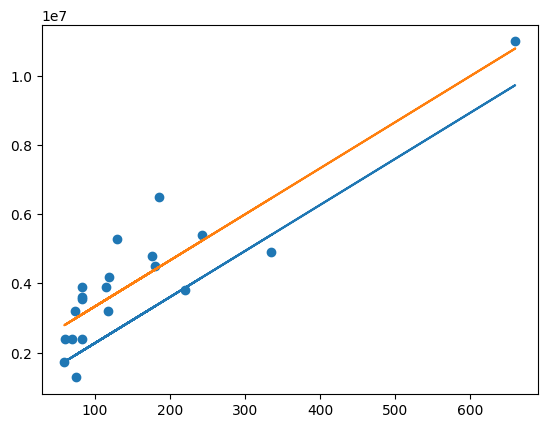

In [ ]:
plt.scatter(tamaños, precios)
plt.plot(tamaños, yclase)
plt.plot(tamaños, ygoogle)